In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [3]:
path = '../'
executable = 'bin/ex1'
# config_file = 'bin/configuration.in.example'

In [4]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    print(f"Running with config file {config_file}")
    options = ' '.join(map(lambda a: a[0] + "=" + str(a[1]), tuple(params.items())))
    cmd = f"{path}{executable} {path}{config_file} output={path}{output_file} {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True)
    print("Done")

In [5]:
nsteps = np.array([400, 800]) # TODO change
nsimul = len(nsteps)  # Number of simulations to perform
dt = 600 / nsteps #tfin / nsteps

m = 0  
v = 0
omega = 0  
# add the other variables
# TODO: Insert here the expressions for the exact final solution
x_th  = 0 
y_th  = 0
vx_th = 0
vy_th = 0
"""
... and other parameters
"""

'\n... and other parameters\n'

In [6]:
paramstr = 'nsteps'  # Parameter name to scan
param = nsteps  # Parameter values to scan

# Simulations
outputs = []  # List to store output file names
vy_list = []
for i in range(nsimul):
    output_file = f"data/{paramstr}={param[i]}.out"
    outputs.append(output_file)
    run('bin/configuration.in.example', output_file, {paramstr: param[i], 'alpha': 0.5, 'g': 0})

Running with config file bin/configuration.in.example
Running command `../bin/ex1 ../bin/configuration.in.example output=../data/nsteps=400.out nsteps=400 alpha=0.5 g=0`
	tfin=600
	nsteps=400
	x0=0
	y0=0
	vx0=0
	vy0=1
	mass=0.056
	g=0
	omega=10
	mu=6
	R=0.033
	rho=1.2
	Ct=0
	sampling=1
	tol=1e-05
	maxit=200
	alpha=0.5
	output=../data/nsteps=400.out
Fin de la simulation.
Done
Running with config file bin/configuration.in.example
Running command `../bin/ex1 ../bin/configuration.in.example output=../data/nsteps=800.out nsteps=800 alpha=0.5 g=0`
	tfin=600
	nsteps=800
	x0=0
	y0=0
	vx0=0
	vy0=1
	mass=0.056
	g=0
	omega=10
	mu=6
	R=0.033
	rho=1.2
	Ct=0
	sampling=1
	tol=1e-05
	maxit=200
	alpha=0.5
	output=../data/nsteps=800.out
Fin de la simulation.
Done


In [7]:
error = np.zeros(nsimul)

for i in range(nsimul):  # Iterate through the results of all simulations
    data = np.loadtxt(path + outputs[i])  # Load the output file of the i-th simulation
    t = data[:, 0]

    xx = data[-1, 1]  # final position, velocity, energy
    yy = data[-1, 2]
    vx = data[-1, 3]
    vy = data[-1, 4]
    En = data[-1, 5]
    vy_list.append(vy)
    # TODO compute the error for each simulation
    error[i] = 100 

In [8]:
# Plotting
lw = 1.5 # line width. TODO: adjust if needed
fs = 12  # font size. TODO: adjust if needed

Text(0, 0.5, '$y$ [m]')

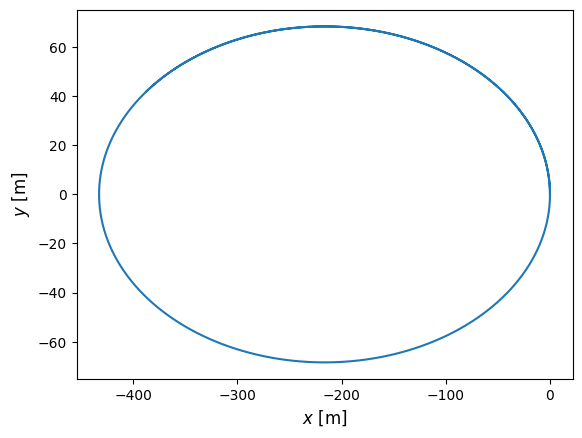

In [9]:
plt.plot(data[:, 1], data[:, 2])
# plt.ticklabel_format(axis='both', style='sci', scilimits=(4,4))
plt.xlabel(r'$x$ [m]', fontsize=fs)
plt.ylabel(r'$y$ [m]', fontsize=fs)

Text(0, 0.5, 'Energy [J]')

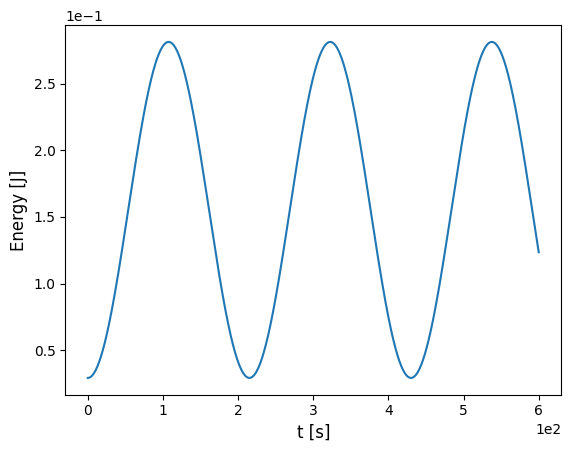

In [10]:
plt.plot(data[:, 0], data[:, 5])
plt.ticklabel_format(axis='both', style='sci', scilimits=(4,2))
plt.xlabel(r't [s]', fontsize=fs)
plt.ylabel(r'Energy [J]', fontsize=fs)

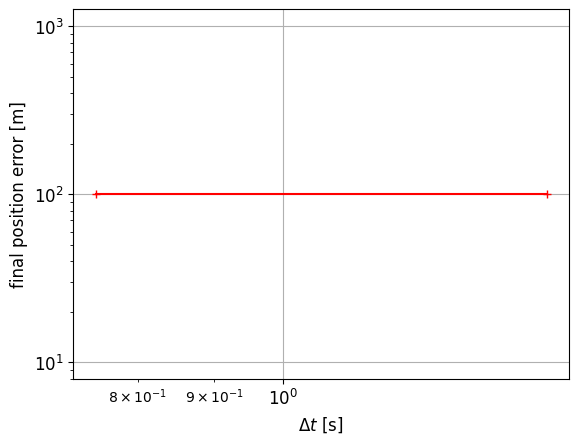

In [11]:
# uncomment the following 2 lines if you want debug
#import pdb
#pbd.set_trace()
plt.loglog(dt, error, 'r+-', linewidth=lw)
plt.xlabel(r'$\Delta t$ [s]', fontsize=fs)
plt.ylabel(r'final position error [m]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid()

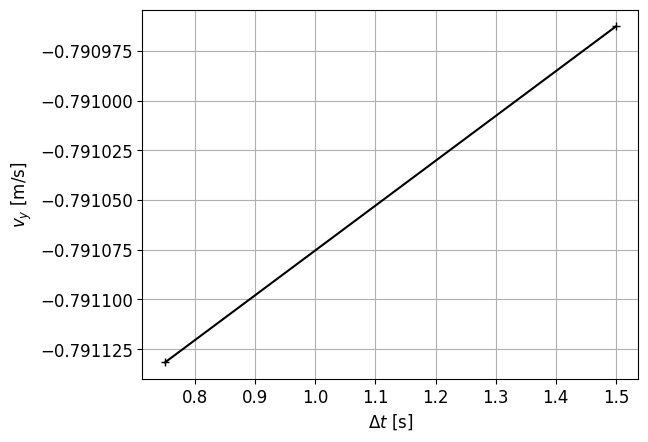

In [12]:
"""
Si on n'a pas la solution analytique: on représente la quantite voulue
(ci-dessous v_y, TODO: modifier selon vos besoins)
en fonction de (Delta t)^norder, ou norder est un entier.
"""
norder = 1  # TODO: Modify if needed

plt.figure()
plt.plot(dt**norder, vy_list, 'k+-', linewidth=lw)
plt.xlabel(r'$\Delta t$ [s]', fontsize=fs)
plt.ylabel(r'$v_y$ [m/s]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.grid()